In [1]:
%tensorflow_version 2.x

In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Dataset

Loading the MNIST dataset from the tensorflow library.
The MNIST dataset contains pictures of handwritten digits in 28x28 pixel size.

In [3]:
mnist = tf.keras.datasets.mnist

loading the dataset into train and test sets.

In [6]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
x_train #displays only arrays not the picture

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
x_test

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

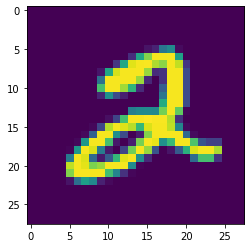

In [10]:
plt.imshow(x_train[5])

Looking into the shapes of each new dataset

In [13]:
print("X_train = ",x_train.shape)
print("X_test = ",x_test.shape)
print("Y_train = ",y_train.shape)
print("Y_test = ",y_test.shape)

X_train =  (60000, 28, 28)
X_test =  (10000, 28, 28)
Y_train =  (60000,)
Y_test =  (10000,)


Normalize the data i.e scale them as the pixel value ranges from 0 to 255

In [14]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

After normalising

In [15]:
x_train.shape

(60000, 28, 28)

We normalize the training and testing data so as to have maximum flexibility for a neural network.

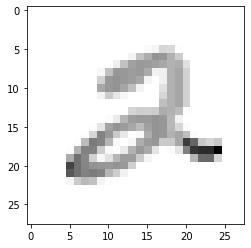

In [17]:
plt.imshow(x_train[5], cmap = plt.cm.binary)

# Building a basic model

In [31]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())

# creating the layers for the network 

model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

# running the network

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=3)

Epoch 1/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2667 - accuracy: 0.9209
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1096 - accuracy: 0.9669
Epoch 3/3
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0748 - accuracy: 0.9763


In [28]:
model.summary

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [20]:
val_loss,val_accuracy = model.evaluate(x_test,y_test)
print("Validation loss = ",val_loss)
print("Validation_accuracy = ",val_accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0991 - accuracy: 0.9702
Validation loss =  0.09913771599531174
Validation_accuracy =  0.9702000021934509


Saving the model to make predictions

In [21]:
model.save("num_dect.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: num_dect.model/assets


In [22]:
new_mod = tf.keras.models.load_model("num_dect.model")

In [23]:
predictons = new_mod.predict([x_test])

In [24]:
print(predictons)

[[1.2039463e-09 6.4862675e-08 1.1788445e-06 ... 9.9999559e-01
  3.3886349e-09 1.9839661e-08]
 [1.8763279e-07 8.8856295e-02 9.1074222e-01 ... 4.6859192e-08
  3.1628795e-05 8.5198321e-10]
 [1.0804442e-08 9.9994361e-01 3.7386992e-06 ... 1.3318333e-05
  3.1631600e-05 1.2387642e-07]
 ...
 [5.9411779e-08 1.0602139e-05 1.9181539e-07 ... 9.4899799e-05
  6.4611260e-07 2.6932813e-04]
 [5.2368167e-05 1.2532888e-06 3.2566113e-08 ... 9.3863555e-06
  1.9913666e-04 9.3278246e-08]
 [1.5216072e-07 5.5688901e-08 6.8992051e-08 ... 2.0323059e-09
  5.1718317e-08 4.7074864e-09]]


In [25]:
print(np.argmax(predictons[0]))

7


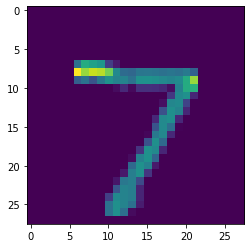

In [26]:
plt.imshow(x_test[0])